## 데이터 불러오기

In [1]:
mypath_train = '/content/drive/MyDrive/머신러닝프로젝트/Fast Food Classification V2/Train'
mypath_test = '/content/drive/MyDrive/머신러닝프로젝트/Fast Food Classification V2/Test'
mypath_val = '/content/drive/MyDrive/머신러닝프로젝트/Fast Food Classification V2/Valid'

In [2]:
import os

labels=[]

# 훈련 데이터셋에 있는 각각의 클래스 식별
for i in os.listdir(mypath_train):
    labels.append(i)
no_labels=len(labels)
print("No of labels : ",no_labels)
print("Labels : ",labels)

No of labels :  10
Labels :  ['Donut', 'Fries', 'Crispy Chicken', 'Taco', 'Baked Potato', 'Burger', 'Hot Dog', 'Pizza', 'Taquito', 'Sandwich']


In [3]:
from tensorflow import keras

# 훈련 및 검증 데이터셋을 위한 이미지 데이터 생성기 설정
datagen_train = keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255.)
datagen_valid = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [4]:
SIZE=(150,150)

# 훈련 및 검증 데이터셋을 로드
train_it = datagen_train.flow_from_directory(batch_size=32,
                                            directory=mypath_train,
                                            shuffle=True,
                                            classes=labels,
                                            target_size=SIZE,
                                            class_mode='categorical')
valid_it = datagen_train.flow_from_directory(
                                            batch_size=32,
                                            directory=mypath_val,
                                            shuffle=True,
                                            classes=labels,
                                            target_size=SIZE,
                                            class_mode='categorical')

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


## 합성곱 신경망 만들기

In [5]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

## 모델 컴파일과 훈련

In [7]:
from keras.src.callbacks import EarlyStopping

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [8]:
history = model.fit(train_it, epochs=20,
                    validation_data=valid_it,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
 33/469 [=>............................] - ETA: 1:15:22 - loss: 2.3080 - accuracy: 0.1061

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 [==============================] - 5941s 13s/step - loss: 2.1953 - accuracy: 0.1806 - val_loss: 2.0951 - val_accuracy: 0.1963
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 501s 1s/step - loss: 2.0788 - accuracy: 0.2321 - val_loss: 2.0314 - val_accuracy: 0.2534
Epoch 3/20
469/469 [==============================] - 510s 1s/step - loss: 1.9526 - accuracy: 0.2991 - val_loss: 1.8258 - val_accuracy: 0.3783
Epoch 4/20
469/469 [==============================] - 514s 1s/step - loss: 1.8229 - accuracy: 0.3616 - val_loss: 1.7713 - val_accuracy: 0.3834
Epoch 5/20
469/469 [==============================] - 476s 1s/step - loss: 1.7345 - accuracy: 0.3966 - val_loss: 1.6166 - val_accuracy: 0.4351
Epoch 6/20
469/469 [==============================] - 503s 1s/step - loss: 1.6526 - accuracy: 0.4267 - val_loss: 1.6152 - val_accuracy: 0.4549
Epoch 7/20
469/469 [==============================] - 504s 1s/step - loss: 1.5861 - accuracy: 0.4556 - val_loss: 1.4800 - val_accuracy: 0.4906
Epoch 8/20
469/469 [==============================] - 472s 1s/step - loss: 1.5195 - accuracy: 0.4837 - val_loss: 1.5459 - val_accuracy: 0.4634
Epoch 9/20

## 평가와 예측


In [9]:
model.evaluate(valid_it)

110/110 [==============================] - 47s 421ms/step - loss: 1.3245 - accuracy: 0.5483


[1.3245325088500977, 0.548285722732544]

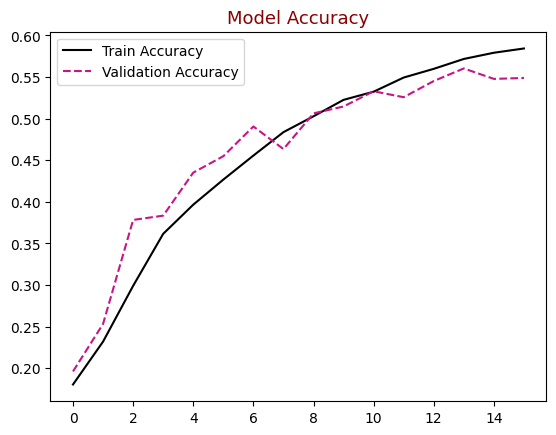

In [10]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy", color="black")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="mediumvioletred", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
plt.title("Model Accuracy", color="darkred", size=13)
plt.legend()
plt.show()

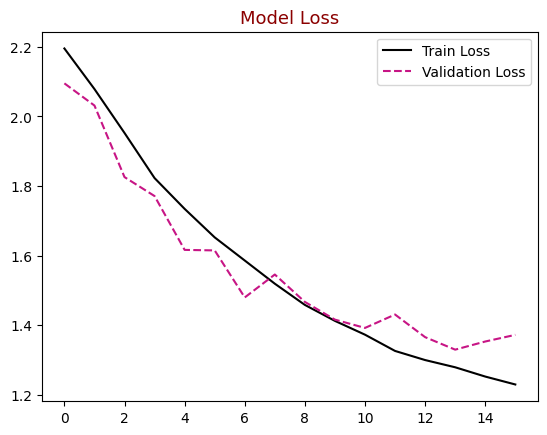

In [11]:
# 손실 그래프
plt.figure()
plt.plot(history.history["loss"],label="Train Loss",color="black")
plt.plot(history.history["val_loss"],label="Validation Loss",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Loss",color="darkred",size=13)
plt.legend()
plt.show()

In [13]:
# 테스트 데이터셋을 위한 이미지 데이터 생성기 설정
datagen_test = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

# 테스트 데이터셋을 로드
test_it = datagen_test.flow_from_directory(batch_size=1,
                                            directory=mypath_test,
                                            shuffle=False,
                                            classes=labels,
                                            target_size=SIZE,
                                            class_mode='categorical')

Found 1500 images belonging to 10 classes.


In [14]:
model.evaluate(test_it)

1500/1500 [==============================] - 481s 321ms/step - loss: 1.3889 - accuracy: 0.5280


[1.3889427185058594, 0.527999997138977]

In [15]:
model.predict(test_it)

1500/1500 [==============================] - 22s 14ms/step


array([[9.95361984e-01, 3.65390719e-07, 5.05439006e-04, ...,
        2.02142444e-04, 1.04384679e-04, 2.72161036e-04],
       [1.40007213e-01, 2.41906736e-02, 2.64004543e-02, ...,
        1.56139970e-01, 7.15301782e-02, 6.67436719e-02],
       [3.47931623e-01, 2.53166985e-02, 8.85300934e-02, ...,
        8.49537924e-02, 2.49368120e-02, 8.08909312e-02],
       ...,
       [1.14139088e-03, 6.64375862e-03, 1.78713165e-02, ...,
        3.39729385e-03, 2.87796594e-02, 3.64000410e-01],
       [3.43363761e-04, 1.06829759e-02, 7.63144135e-01, ...,
        9.79175209e-04, 4.74131405e-02, 3.64621393e-02],
       [2.90568662e-03, 5.62828891e-02, 8.49224031e-02, ...,
        9.15534701e-03, 1.05578646e-01, 1.10338824e-02]], dtype=float32)

In [16]:
import numpy as np

# 이미지를 로드하고 전처리하는 함수
def load_and_preprocess_image(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # 모델 입력을 위해 차원 추가
    img_array /= 255.  # 이미지 정규화
    return img_array

1/1 [==============================] - 0s 74ms/step
Predicted food: Baked Potato
Nutrition Information: {'Calories': 194, 'Protein': '5g', 'Fat': '0.2g', 'Carbohydrates': '44g'}


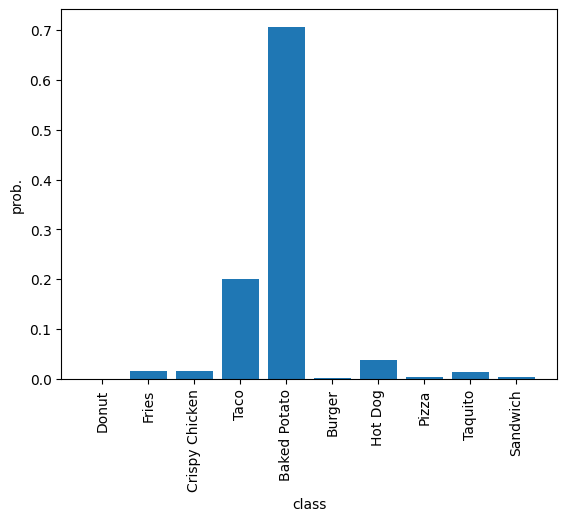

In [53]:
# 각 음식의 영양 정보를 담은 딕셔너리
nutrition_info = {
    'Donut': {'Calories': 452, 'Protein': '4g', 'Fat': '25g', 'Carbohydrates': '51g'},
    'Fries': {'Calories': 365, 'Protein': '4g', 'Fat': '17g', 'Carbohydrates': '48g'},
    'Crispy Chicken': {'Calories': 242, 'Protein': '14g', 'Fat': '13g', 'Carbohydrates': '18g'},
    'Taco': {'Calories': 226, 'Protein': '9g', 'Fat': '12g', 'Carbohydrates': '22g'},
    'Baked Potato': {'Calories': 194, 'Protein': '5g', 'Fat': '0.2g', 'Carbohydrates': '44g'},
    'Burger': {'Calories': 295, 'Protein': '17g', 'Fat': '13g', 'Carbohydrates': '33g'},
    'Hot Dog': {'Calories': 151, 'Protein': '5g', 'Fat': '13g', 'Carbohydrates': '2g'},
    'Pizza': {'Calories': 285, 'Protein': '12g', 'Fat': '10g', 'Carbohydrates': '36g'},
    'Taquito': {'Calories': 250, 'Protein': '10g', 'Fat': '14g', 'Carbohydrates': '22g'},
    'Sandwich': {'Calories': 299, 'Protein': '12g', 'Fat': '4g', 'Carbohydrates': '50g'}
}

# 이미지 경로
img_path = '/content/drive/MyDrive/머신러닝프로젝트/Fast Food Classification V2/Test/Baked Potato/Baked Potato-Test (11).jpeg'

# 이미지를 로드하고 전처리
img_array = load_and_preprocess_image(img_path)

# 모델을 사용하여 예측 수행
preds = model.predict(img_array)

labels :  ['Donut', 'Fries', 'Crispy Chicken', 'Taco', 'Baked Potato', 'Burger', 'Hot Dog', 'Pizza', 'Taquito', 'Sandwich']

# 예측된 클래스 이름
predicted_class_name = labels[np.argmax(preds)]

# 예측된 클래스의 영양 정보
nutrition = nutrition_info.get(predicted_class_name, "No nutrition information available")

print(f"Predicted food: {predicted_class_name}")
print(f"Nutrition Information: {nutrition}")

plt.bar(range(1, 11), preds[0])
plt.xticks(range(1, 11), labels, rotation=90)
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()